IMPORTS

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, preprocessing
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.text import one_hot
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


FILE UPLOADS

In [ ]:
from google.colab import files
uploaded = files.upload()
# https://www.kaggle.com/datasets/vivmankar/physics-vs-chemistry-vs-biology

Saving test.csv to test.csv
Saving train.csv to train.csv


IMPORTS & DataFrame

In [ ]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
test_df = test_df[['Comment', 'Topic']]
# print("Test dataframe:\n", test_df.head(), "\n Shape:", test_df.shape)
print("Test Shape:", test_df.shape)
train_df = train_df[['Comment', 'Topic']]
# print("Test dataframe:\n", train_df.head(), "\n Shape:",train_df.shape)
print("Train Shape:", train_df.shape)

Test Shape: (1586, 2)
Train Shape: (8695, 2)


LENGTHS

In [ ]:
max_len_test = test_df['Comment'].apply(lambda x: len(max(x.split(), key=len))).max()
print("Longest Vocab Test:", max_len_test)
max_len_train = train_df['Comment'].apply(lambda x: len(max(x.split(), key=len))).max()
print("Longest Vocab Train:", max_len_train)

Longest Vocab Test: 505
Longest Vocab Train: 402


ECODE, FIT, TRAIN

In [ ]:
lbl_encoder = LabelEncoder()
txt_tokenizer = Tokenizer(num_words=2000,
                          filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                          lower=True,
                          split=' ', )

lbl_encoder.fit(test_df['Topic'])
lbl_encoder.fit(train_df['Topic'])
test_df['Encoded_Labels'] = lbl_encoder.transform(test_df['Topic'])
train_df['Encoded_Labels'] = lbl_encoder.transform(train_df['Topic'])
# print("Train", train_df.head())
# print("Test", test_df.head())
y_test = test_df.Encoded_Labels
y_train = train_df.Encoded_Labels

# Vectorize the text
txt_tokenizer.fit_on_texts(train_df.Comment)
x_train = txt_tokenizer.texts_to_matrix(train_df.Comment, mode='tfidf')
x_test = txt_tokenizer.texts_to_matrix(test_df.Comment, mode='tfidf')
print(x_train)

[[0.         4.52797955 4.42670578 ... 0.         0.         0.        ]
 [0.         0.         1.30277876 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         1.18124903 0.         ... 0.         0.         0.        ]
 [0.         3.47985351 2.20579618 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<Axes: xlabel='Topic', ylabel='count'>

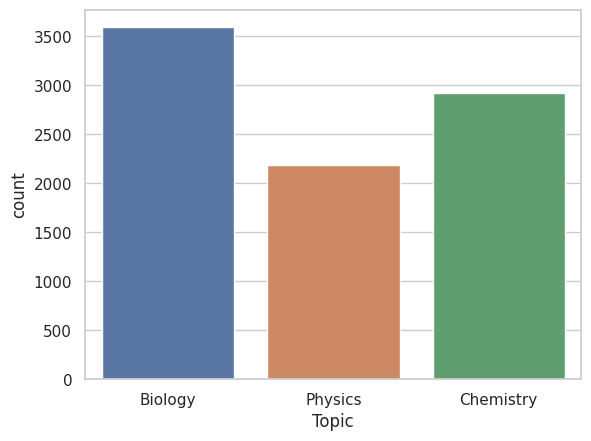

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(x="Topic", data=train_df,)

# X = train_df.Comment
# y = train_df.Encoded_Labels
# data_y = pd.DataFrame(y, columns=['Encoded_label'])
# print(train_df.shape, list(train_df.columns))
# sb.countplot(x="label", data=train_df,)

#plt.show()

SEQUENTIAL MODEL

1.) Input Shape

In [ ]:
layer = layers.Dense(3)
x = x_train
y =layer(x)
layer.weights  # Shape (2000,3)

[<tf.Variable 'dense/kernel:0' shape=(2000, 3) dtype=float32, numpy=
 array([[-0.02664427, -0.01370286, -0.0466907 ],
        [-0.0235822 ,  0.03238276,  0.0081976 ],
        [ 0.05319918,  0.00562685,  0.01604755],
        ...,
        [-0.02266423,  0.02491026, -0.00436984],
        [ 0.0107451 ,  0.04653747,  0.01302297],
        [-0.05252691,  0.0239406 , -0.04269776]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

MODEL CREATION & EVAULATION

In [ ]:
# -----------------------------------Sequential Model---------------------------
# Sequential model--4 dense later with a dropout and softmax layer
model = Sequential()
model.add(layers.Dense(128, input_dim=2000, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.15))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))
model.add(layers.Dense(1, activation='sigmoid'))


#compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
                    batch_size=30,
                    epochs=20,
                    verbose=1,
                    validation_split=0.1)
score = model.evaluate(x_test, y_test, batch_size=30, verbose=1)
print('Accuracy: ', score[1])
print(score)

Epoch 1/20
261/261 [==============================] - 7s 11ms/step - loss: 0.4743 - accuracy: 0.3677 - val_loss: 0.3657 - val_accuracy: 0.4736
Epoch 2/20
261/261 [==============================] - 2s 7ms/step - loss: 0.2509 - accuracy: 0.5344 - val_loss: 0.2480 - val_accuracy: 0.5322
Epoch 3/20
261/261 [==============================] - 2s 7ms/step - loss: 0.0745 - accuracy: 0.5986 - val_loss: 0.1744 - val_accuracy: 0.5391
Epoch 4/20
261/261 [==============================] - 2s 8ms/step - loss: -0.0811 - accuracy: 0.6318 - val_loss: 0.0969 - val_accuracy: 0.5437
Epoch 5/20
261/261 [==============================] - 3s 10ms/step - loss: -0.2205 - accuracy: 0.6533 - val_loss: 0.0580 - val_accuracy: 0.5517
Epoch 6/20
261/261 [==============================] - 2s 9ms/step - loss: -0.3521 - accuracy: 0.6677 - val_loss: -0.0040 - val_accuracy: 0.5644
Epoch 7/20
261/261 [==============================] - 2s 7ms/step - loss: -0.4742 - accuracy: 0.6791 - val_loss: -0.0463 - val_accuracy: 0.558

PLOTS OF TRAINING ACCURACY AND LOSS

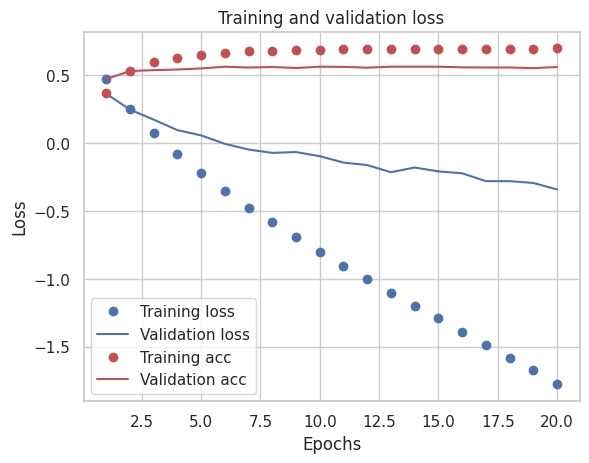

In [ ]:
# plot the training and validation loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
#plt.ylim([-1.9, 1])
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

50/50 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       614
           1       0.43      0.89      0.58       506
           2       0.00      0.00      0.00       466

    accuracy                           0.56      1586
   macro avg       0.42      0.53      0.45      1586
weighted avg       0.45      0.56      0.48      1586



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SIMPLE LSTM /GRU


In [ ]:
max_features = 2000
maxlen = 500
batch_size = 32
train_data = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
test_data = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

model2 = models.Sequential()
model2.add(layers.Embedding(max_features, 32))
# model2.add(layers.LSTM(32))
model2.add(layers.GRU(32))
model2.add(layers.Dense(8, activation='softmax'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(train_data,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)
score = model2.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('Accuracy: ', score[1])
print(score)

Epoch 1/10
62/62 [==============================] - 32s 476ms/step - loss: 0.5875 - accuracy: 0.3356 - val_loss: 0.5281 - val_accuracy: 0.3379
Epoch 2/10
62/62 [==============================] - 32s 515ms/step - loss: 0.5039 - accuracy: 0.3356 - val_loss: 0.5061 - val_accuracy: 0.3379
Epoch 3/10
62/62 [==============================] - 25s 402ms/step - loss: 0.4872 - accuracy: 0.3356 - val_loss: 0.4934 - val_accuracy: 0.3379
Epoch 4/10
62/62 [==============================] - 26s 416ms/step - loss: 0.4744 - accuracy: 0.3356 - val_loss: 0.4840 - val_accuracy: 0.3379
Epoch 5/10
62/62 [==============================] - 25s 400ms/step - loss: 0.4644 - accuracy: 0.3356 - val_loss: 0.4764 - val_accuracy: 0.3379
Epoch 6/10
62/62 [==============================] - 26s 421ms/step - loss: 0.4568 - accuracy: 0.3356 - val_loss: 0.4712 - val_accuracy: 0.3379
Epoch 7/10
62/62 [==============================] - 24s 388ms/step - loss: 0.4511 - accuracy: 0.3356 - val_loss: 0.4677 - val_accuracy: 0.3379

In [ ]:
pred2 = model.predict(x_test)
pred2 = [1.0 if p>= 0.5 else 0.0 for p in pred2]
print(classification_report(y_test, pred2))

50/50 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       614
           1       0.43      0.89      0.58       506
           2       0.00      0.00      0.00       466

    accuracy                           0.56      1586
   macro avg       0.42      0.53      0.45      1586
weighted avg       0.45      0.56      0.48      1586



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model3 = Sequential()
model3.add(layers.Embedding(max_features, 32))
model3.add(layers.Dense(128, input_dim=2000, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dropout(0.15))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(8, activation='softmax'))
model3.add(layers.Dense(1, activation='sigmoid'))


#compile the model
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history3 = model3.fit(x_train, y_train,
                    batch_size=30,
                    epochs=20,
                    verbose=1,
                    validation_split=0.1)
score = model3.evaluate(x_test, y_test, batch_size=30, verbose=1)
print('Accuracy: ', score[1])
print(score)

Epoch 1/20
261/261 [==============================] - 57s 212ms/step - loss: 0.5035 - accuracy: 0.3356 - val_loss: 0.4832 - val_accuracy: 0.3379
Epoch 2/20
261/261 [==============================] - 54s 208ms/step - loss: 0.4579 - accuracy: 0.3356 - val_loss: 0.4687 - val_accuracy: 0.3379
Epoch 3/20
261/261 [==============================] - 57s 218ms/step - loss: 0.4470 - accuracy: 0.3356 - val_loss: 0.4646 - val_accuracy: 0.3379
Epoch 4/20
261/261 [==============================] - 53s 204ms/step - loss: 0.4430 - accuracy: 0.3356 - val_loss: 0.4634 - val_accuracy: 0.3379
Epoch 5/20
261/261 [==============================] - 54s 207ms/step - loss: 0.4415 - accuracy: 0.3356 - val_loss: 0.4633 - val_accuracy: 0.3379
Epoch 6/20
261/261 [==============================] - 58s 223ms/step - loss: 0.4408 - accuracy: 0.3356 - val_loss: 0.4634 - val_accuracy: 0.3379
Epoch 7/20
261/261 [==============================] - 52s 201ms/step - loss: 0.4406 - accuracy: 0.3356 - val_loss: 0.4636 - val_ac

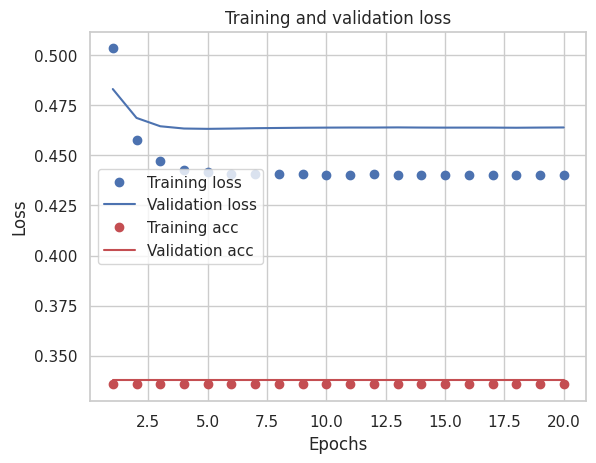

In [ ]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss)+1)
#plt.ylim([-1.9, 1])
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
pred3 = model.predict(x_test)
pred3 = [1.0 if p>= 0.5 else 0.0 for p in pred3]
print(classification_report(y_test, pred2))

50/50 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       614
           1       0.43      0.89      0.58       506
           2       0.00      0.00      0.00       466

    accuracy                           0.56      1586
   macro avg       0.42      0.53      0.45      1586
weighted avg       0.45      0.56      0.48      1586



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
